# <center>Analysis of How the Number of Branches Per Simulation Affects Performance</center>

This file is an interactive notebook to analyze the data obtained from tests.<br>
It focuses on examining what happens when the branching factor of each hypergame is increased. A lower branching factor leads to greater exploration of the overall tree, but it means that it is more likely that each hypergame will need to backtrack.

Since kriegTTT_4x4 has a maximum of 16 possible moves, a branching factor of 16 is the highest since this will branch the initial state in every possible way up to the maximum number of hypergames. A branching factor of 2 is the minimum since each state will be updated once and branched once (the 2 includes the update process as well).<br>
It is expected that the branching factor of 2 will perform better since it can cover more of the tree and is therefore less sensitive to backtracking when it must occur, however it also increases the likelihood of backtracking.

This notebook extends the previous notebook **TestAnalysisNumBranches** by holding the number of simulations of each move constant regardless the number of hypergames held in the set at the time of calculation. This has been done to investigate if the reason why the games with a higher branching factor performed better was due to having more hypergames to work with.

NumHyperGames = 16<br>
NumProbes = 4

## Reading in the Data

First the match data must be read in.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics
np.random.seed(42)

# Read in the csv files
numBranches_count = [16, 8, 4, 2]
numNames = ['numBranchesFixedNumSim_16', 'numBranchesFixedNumSim_8', 'numBranchesFixedNumSim_4', 'numBranchesFixedNumSim_2']
data = list()

for idx, name in enumerate(numNames):
    file_name = 'testOutput/kriegTTT_4x4/numBranchesFixedNumSim/' + name + '/testOutput.csv'
    data.append(pd.DataFrame)
    data[idx] = pd.read_csv(file_name, header=0)

# Print the first 5 rows of the data
for game in data:
    display(game.head())

,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numBranchesFixedNumSim16_0,kriegTTT_4x4,2,1593050557903,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numBranchesFixedNumSim16_1,kriegTTT_4x4,2,1593050578916,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numBranchesFixedNumSim16_2,kriegTTT_4x4,2,1593050609280,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numBranchesFixedNumSim16_4,kriegTTT_4x4,2,1593051079494,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numBranchesFixedNumSim16_5,kriegTTT_4x4,2,1593051107860,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,2,1593054734199,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numBranchesFixedNumSim2_1,kriegTTT_4x4,2,1593054770428,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numBranchesFixedNumSim2_2,kriegTTT_4x4,2,1593054807592,10,300,XPLAYER,6,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numBranchesFixedNumSim2_3,kriegTTT_4x4,2,1593054830457,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numBranchesFixedNumSim2_4,kriegTTT_4x4,2,1593054852975,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numBranchesFixedNumSim4_0,kriegTTT_4x4,2,1593057782644,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numBranchesFixedNumSim4_1,kriegTTT_4x4,2,1593057811453,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numBranchesFixedNumSim4_2,kriegTTT_4x4,2,1593057833995,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numBranchesFixedNumSim4_3,kriegTTT_4x4,2,1593057862705,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numBranchesFixedNumSim4_4,kriegTTT_4x4,2,1593057884255,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,2,1593052695614,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numBranchesFixedNumSim2_1,kriegTTT_4x4,2,1593052718108,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numBranchesFixedNumSim2_2,kriegTTT_4x4,2,1593052740072,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numBranchesFixedNumSim2_3,kriegTTT_4x4,2,1593052760609,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numBranchesFixedNumSim2_4,kriegTTT_4x4,2,1593052789405,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0


Next, the move data should be read in for each match

*Note: time_to_update and time_to_select_move are in milliseconds*

In [12]:
move_list_games = list()
for idx, name in enumerate(numNames):
    file_name_prefix = 'testOutput/kriegTTT_4x4/numBranchesFixedNumSim/' + name + '/moveset/'
    temp_move_list = list()
    for match_name in data[idx]['match_id']:
        file_name = file_name_prefix + match_name + '.csv'
        temp_move_list.append(pd.read_csv(file_name, header=0))
    move_list_games.append(temp_move_list)

# Verify by printing the head of the first game
for move_list in move_list_games:
    display(move_list[0])

,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numBranchesFixedNumSim16_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,4,0,(MARK 3 4 )
1,hypertest_numBranchesFixedNumSim16_0,kriegTTT_4x4,0,XPLAYER,hyper,1,6,4,8296,(MARK 2 3 )
2,hypertest_numBranchesFixedNumSim16_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,19,0,(MARK 3 3 )
3,hypertest_numBranchesFixedNumSim16_0,kriegTTT_4x4,1,XPLAYER,hyper,15,6,19,6056,(MARK 3 3 )
4,hypertest_numBranchesFixedNumSim16_0,kriegTTT_4x4,2,OPLAYER,imprandom,29,4,127,0,(MARK 2 1 )
5,hypertest_numBranchesFixedNumSim16_0,kriegTTT_4x4,2,XPLAYER,hyper,16,6,117,5821,(MARK 2 2 )
6,hypertest_numBranchesFixedNumSim16_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,59,0,(MARK 4 1 )
7,hypertest_numBranchesFixedNumSim16_0,kriegTTT_4x4,3,XPLAYER,hyper,16,6,24,4248,(MARK 2 4 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,1,0,(MARK 4 1 )
1,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,0,XPLAYER,hyper,1,6,1,8910,(MARK 1 4 )
2,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,20,0,(MARK 3 3 )
3,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,1,XPLAYER,hyper,8,6,9,7211,(MARK 4 3 )
4,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,51,0,(MARK 4 2 )
5,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,2,XPLAYER,hyper,16,6,11,5349,(MARK 2 4 )
6,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,164,0,(MARK 1 1 )
7,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,3,XPLAYER,hyper,16,6,111,3890,(MARK 3 4 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numBranchesFixedNumSim4_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,1,0,(MARK 4 4 )
1,hypertest_numBranchesFixedNumSim4_0,kriegTTT_4x4,0,XPLAYER,hyper,1,6,1,8769,(MARK 2 2 )
2,hypertest_numBranchesFixedNumSim4_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,9,0,(MARK 4 1 )
3,hypertest_numBranchesFixedNumSim4_0,kriegTTT_4x4,1,XPLAYER,hyper,4,6,0,6769,(MARK 2 4 )
4,hypertest_numBranchesFixedNumSim4_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,50,0,(MARK 1 4 )
5,hypertest_numBranchesFixedNumSim4_0,kriegTTT_4x4,2,XPLAYER,hyper,16,6,10,5440,(MARK 2 3 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,4,0,(MARK 2 4 )
1,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,0,XPLAYER,hyper,1,6,4,8334,(MARK 2 3 )
2,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,17,0,(MARK 2 2 )
3,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,1,XPLAYER,hyper,2,6,4,6666,(MARK 3 3 )
4,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,49,0,(MARK 1 2 )
5,hypertest_numBranchesFixedNumSim2_0,kriegTTT_4x4,2,XPLAYER,hyper,4,6,3,3499,(MARK 4 3 )


## Analysis of Data

### Overall Agent Results

The average score of the agent will be calculated across all games

The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 16 branches is 100.00% for 49 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 8 branches is 92.00% for 50 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 4 branches is 100.00% for 49 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 2 branches is 92.00% for 50 games


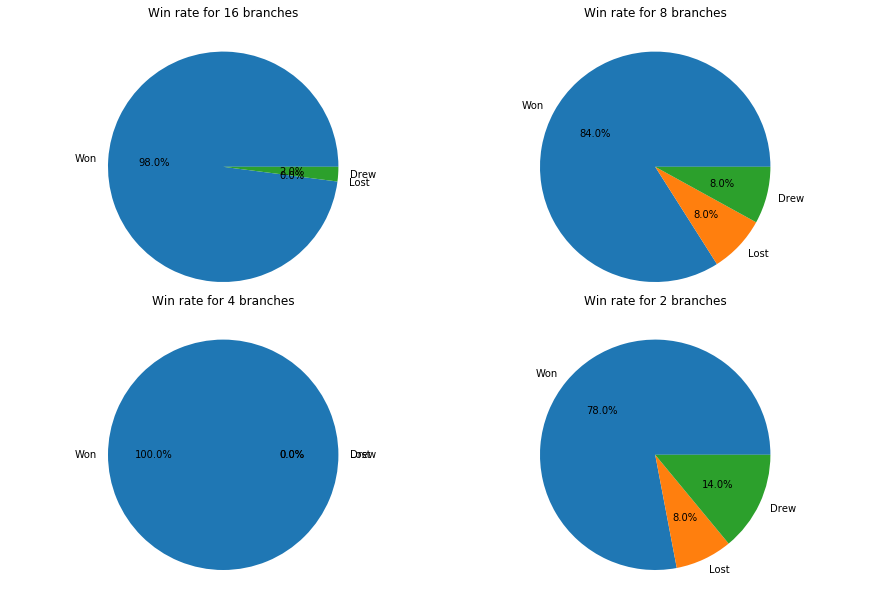

In [13]:
count_games_completed = list()
for idx, game in enumerate(data):
    total_score = data[idx]['player_1_score'].sum(skipna = True)
    total_count = len(data[idx]['player_1_score'])
    count_games_completed.append(total_count)
    print(f"The win/draw rate for the agent \"" + str(data[idx]['player_1'][0]) + "\" playing the game \"" + str(data[idx]['game_name'][0]) + "\" with " + str(numBranches_count[idx]) + f" branches is {(total_score/total_count):.2f}% for " + str(total_count) + " games")

# Display a pie chart
fig = plt.figure()
data_len = len(data)
win_count = list()
for idx, game in enumerate(data):
    ax = fig.add_axes([(data_len - idx)%2,math.ceil((data_len - idx)/2),1,1])
    ax.axis('equal')
    ax.set_title('Win rate for ' + str(numBranches_count[idx]) + ' branches')
    result = ['Won', 'Lost', 'Drew']
    game_count = [len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 0)]), len(game[(game['player_1_score'] == 0) & (game['player_2_score'] == 100)]), len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 100)])]
    win_count.append(game_count[0])
    ax.pie(game_count, labels = result,autopct='%1.1f%%')
plt.show()

**These results are not what was expected!!**

It is now worth looking into how performance changes with a lower branching factor.<br>
First I will consider the number of games that can be completed without error compared to the number of branches.

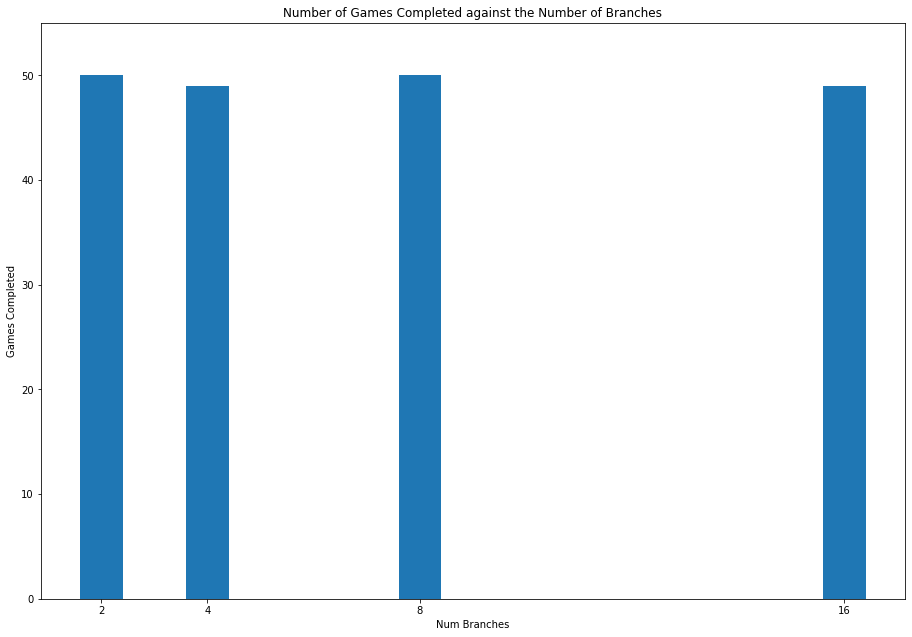

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2], label='state_update')
ax1.set_title('Number of Games Completed against the Number of Branches')
ax1.set_xlabel('Num Branches')
ax1.set_ylabel('Games Completed')
ax1.set_yscale('linear')
ax1.set_xticks(numBranches_count)
ax1.set_ylim([0,55])
ax1.bar(numBranches_count, count_games_completed)
plt.show()

I will now consider how the ratio of games completed compares against the number of branches

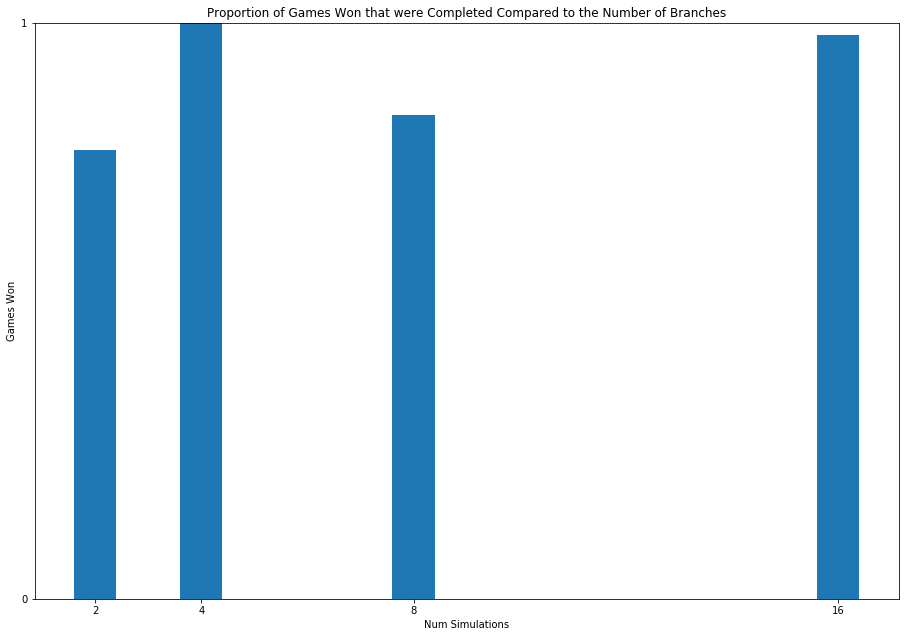

In [15]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Proportion of Games Won that were Completed Compared to the Number of Branches')
ax1.set_xlabel('Num Simulations')
ax1.set_ylabel('Games Won')
ax1.set_yscale('linear')
ax1.set_xticks(numBranches_count)
ax1.set_yticks(range(0,2,1))
ax1.set_ylim([0,1])
ax1.bar(numBranches_count, np.divide(win_count,count_games_completed))
plt.show()

I will now consider the average time taken to win for various hypergames.

*Note: It is +1 because step increments from 0*

16 simulations
	Mean steps to win: 3
	Median steps to win: 3.0
8 simulations
	Mean steps to win: 3
	Median steps to win: 3.5
4 simulations
	Mean steps to win: 3
	Median steps to win: 3
2 simulations
	Mean steps to win: 3
	Median steps to win: 3


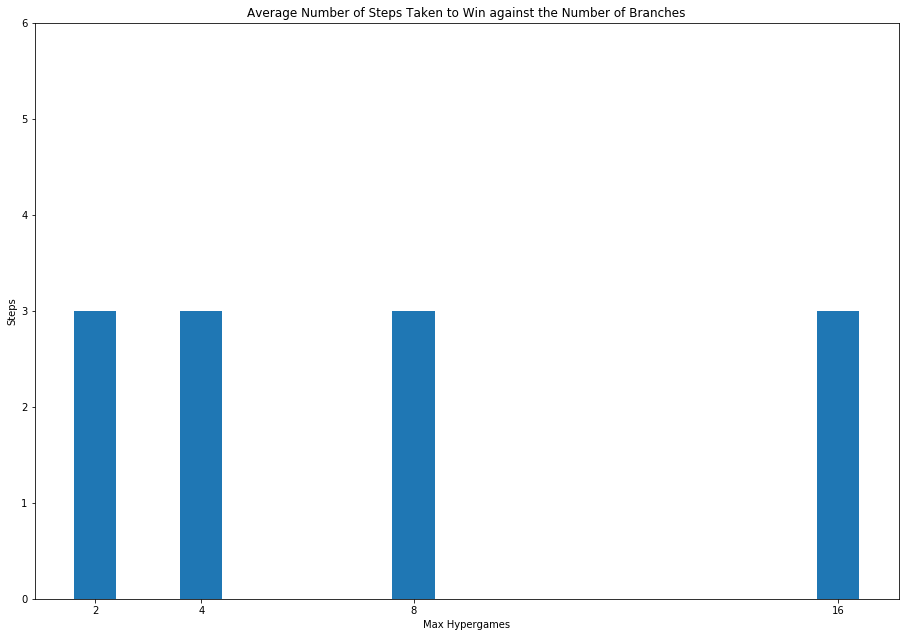

In [16]:
# Calculate the average number of steps taken to win for each hypergame
steps_to_win_list = list()
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    game_steps_to_win_list = list()
    winning_games = game[((game['player_1_score'] == 100) & (game['player_2_score'] == 0))] 
    winning_games_list = winning_games['match_id'].tolist()
    for moves in move_list:
        if(moves['match_id'][0] in winning_games_list):
            move_length = len(moves['match_id'])
            game_steps_to_win_list.append(moves['step'][move_length - 1] + 1)
    steps_to_win_list.append(game_steps_to_win_list)

# Print steps to win
mean_steps_to_win = list()
median_steps_to_win = list()
for idx, game_steps_to_win in enumerate(steps_to_win_list):
    mean = statistics.mean(game_steps_to_win)
    print(f'{numBranches_count[idx]} simulations')
    print(f'\tMean steps to win: {mean}')
    print(f'\tMedian steps to win: {statistics.median(game_steps_to_win)}')
    mean_steps_to_win.append(mean)

# Graph steps to win
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Average Number of Steps Taken to Win against the Number of Branches')
ax1.set_xlabel('Max Hypergames')
ax1.set_ylabel('Steps')
ax1.set_yscale('linear')
ax1.set_xticks(numBranches_count)
ax1.set_yticks(range(0,10,1))
ax1.set_ylim([0,6])
ax1.bar(numBranches_count, mean_steps_to_win)
plt.show()

### Move Results

Calculating the average move time per game.
This is expected to grow with the depth of the game and is expected to be different for the state update and the move selection.

In [17]:
class Tracker:
    '''
    Tracker tracks the average time for each move of each game played
    '''
    def __init__(self):
        self.time_sum = 0
        self.num_moves = 0
        self.times = list()
    
    def __str__(self):
        return "time_sum: " + str(self.time_sum) + " ms\n\tnum_moves: " + str(self.num_moves) + "\n\tmean_time: " + str(statistics.mean(self.times)) + "\n\tmedian_time: " + str(statistics.median(self.times)) + " ms\n\ttimes (ms): " + str(self.times)
    
    def addMove(self, num):
        self.time_sum += num
        self.num_moves+=1
        self.times.append(num)
    
    def getMeanTime(self):
        return statistics.mean(self.times)
    
    def getMedianTime(self):
        return statistics.median(self.times)

# Add the results for each move of each game played to a list of trackers for the update and select move times for the chosen player
time_to_update_list = list()
time_to_select_move_list = list()
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    temp_time_to_update_list = list()
    temp_time_to_select_move_list = list()
    player_name = game['role_1'][0].upper()
    for move_set in move_list:
        for index, move_row in move_set.iterrows():
            if move_row['role_name'] == player_name:
                if move_row['step'] > len(temp_time_to_update_list) - 1:
                    temp_time_to_update_list.append(Tracker())
                    temp_time_to_select_move_list.append(Tracker())
                temp_time_to_update_list[move_row['step']].addMove(move_row['time_to_update'])
                temp_time_to_select_move_list[move_row['step']].addMove(move_row['time_to_select_move'])
    time_to_update_list.append(temp_time_to_update_list)
    time_to_select_move_list.append(temp_time_to_select_move_list)

# Print the data
for game_num, (game_time_to_update_list, game_time_to_select_move_list) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    print(str(numBranches_count[game_num]) + ' branches')
    for idx, (update_step, select_step) in enumerate(zip(game_time_to_update_list, game_time_to_select_move_list)):
        print('\tStep: ' + str(idx) + "\n")
        print('\tTime taken to update states:')
        print('\t' + str(update_step)  + "\n")
        print('\tTime taken to select move:')
        print('\t' + str(select_step)  + "\n\n\n")

16 branches
	Step: 0

	Time taken to update states:
	time_sum: 127 ms
	num_moves: 49
	mean_time: 2.5918367346938775
	median_time: 3 ms
	times (ms): [4, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 3, 4, 3, 5, 5, 4, 5, 5, 8, 9, 4, 5, 5, 5, 5, 5, 5]

	Time taken to select move:
	time_sum: 417855 ms
	num_moves: 49
	mean_time: 8527.65306122449
	median_time: 8352 ms
	times (ms): [8296, 8544, 9047, 8352, 8534, 8724, 9503, 8314, 8102, 8070, 8003, 8039, 8068, 8216, 8030, 8199, 8159, 8604, 8619, 8448, 8291, 8576, 8252, 8250, 8213, 8371, 8186, 8294, 8663, 9308, 8129, 8363, 8442, 8572, 8730, 9060, 8442, 8559, 9255, 10315, 10030, 9624, 8326, 8434, 8286, 8348, 8094, 8252, 8319]



	Step: 1

	Time taken to update states:
	time_sum: 831 ms
	num_moves: 49
	mean_time: 16.959183673469386
	median_time: 17 ms
	times (ms): [19, 28, 17, 21, 17, 16, 16, 6, 15, 15, 15, 16, 12, 6, 15, 15, 16, 18, 15, 18, 15, 15, 15, 6, 22, 15, 21, 6, 15, 16, 18, 18, 19, 17, 19, 1

Now I will graph the findings

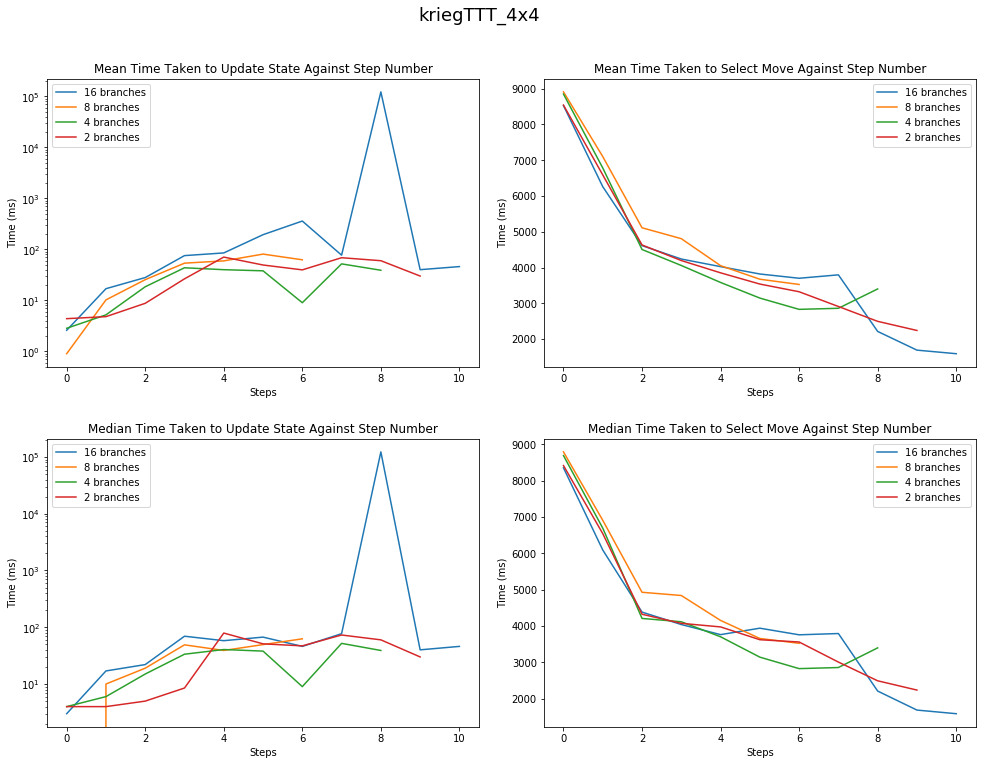

In [18]:
# Add the data to an array
mean_state_update_times = list()
mean_move_select_times = list()
median_state_update_times = list()
median_move_select_times = list()
for game_num, (game_time_to_update_list, game_time_to_select_move_list) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    temp_mean_state_update_times = list()
    temp_mean_move_select_times = list()
    temp_median_state_update_times = list()
    temp_median_move_select_times = list()
    for update_step, select_step in zip(game_time_to_update_list, game_time_to_select_move_list):
        temp_mean_state_update_times.append(update_step.getMeanTime())
        temp_mean_move_select_times.append(select_step.getMeanTime())
        temp_median_state_update_times.append(update_step.getMedianTime())
        temp_median_move_select_times.append(select_step.getMedianTime())
    mean_state_update_times.append(temp_mean_state_update_times)
    mean_move_select_times.append(temp_mean_move_select_times)
    median_state_update_times.append(temp_median_state_update_times)
    median_move_select_times.append(temp_median_move_select_times)

# Put into graphs
fig = plt.figure()
fig.suptitle(str(data[0]['game_name'][0]), x=1, y=2.5, fontsize=18)

# Draw mean graph for State Update
ax1 = fig.add_axes([0,1.25,1,1], label='state_update_mean')
ax1.set_title('Mean Time Taken to Update State Against Step Number')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Time (ms)')
ax1.set_yscale('log')
for idx, game_mean_state_update_times in enumerate(mean_state_update_times):
    ax1.plot(game_mean_state_update_times, label=str(numBranches_count[idx]) + ' branches')
ax1.legend()

# Draw mean graph for Move Select
ax2 = fig.add_axes([1.15,1.25,1,1], label='move_select_mean')
ax2.set_title('Mean Time Taken to Select Move Against Step Number')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Time (ms)')
ax2.set_yscale('linear')
for idx, game_mean_move_select_times in enumerate(mean_move_select_times):
    ax2.plot(game_mean_move_select_times, label=str(numBranches_count[idx]) + ' branches')
ax2.legend()

# Draw median graph for State Update
ax3 = fig.add_axes([0,0,1,1], label='state_update_median')
ax3.set_title('Median Time Taken to Update State Against Step Number')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Time (ms)')
ax3.set_yscale('log')
for idx, game_median_state_update_times in enumerate(median_state_update_times):
    ax3.plot(game_median_state_update_times, label=str(numBranches_count[idx]) + ' branches')
ax3.legend()

# Draw median graph for Move Select
ax4 = fig.add_axes([1.15,0,1,1], label='move_select_median')
ax4.set_title('Median Time Taken to Select Move Against Step Number')
ax4.set_xlabel('Steps')
ax4.set_ylabel('Time (ms)')
ax4.set_yscale('linear')
for idx, game_median_move_select_times in enumerate(median_move_select_times):
    ax4.plot(game_median_move_select_times, label=str(numBranches_count[idx]) + ' branches')
ax4.legend()

plt.show()